# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 4</p>
### <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Wed, **Nov, 3rd** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Shubham Singh

EID: ss96589


## Thank you for sharing Dice experiment papers, 

#Question 1: Reject option (10 pts)

Consider a binary classification problem with the following loss matrix, where the cost of rejection is a constant. 

$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C_1 & C_2 & Reject\\
   \text{True class} & C_1 & 0 & 2 & c  \\
   & C_2 & 4 & 0 & c \\
  \end{array} } 
$$

If $c$ = 1, determine the respective predicted classes that will minimize the expected loss when $P(C_1|x)$ falls in different value intervals. That is, please give the decision rules for $C_1$, $C_2$ and $Reject$.

## Answer:

The region space for a particular class is determined using the posterior probabilities of a class given feature value. This posterior probability is itself dependent on joint probability distribution of Class${_i}$ and feature x.

The class label, for a set of x values, is assigned to the class which has higher joint probability value with x in that specific region.

Overlapping of joint distribution functions of two or more present classes lead to origination of error.
For example the probability of occurance of P(C${_1}$,x) in C2 space lead to error in that region.

Equation/s associated with probability distributions of two or more classes help one determine region boundaries for different classes.

For utility and application purposes, one defines loss associated with each fasle prediction and the equate these losses to find region boundaries.
Loss for specific class in respective region space is determined by multiplying joint probability distribution with associated loss.
The equation related sum of losses for different classes help us determine region boundaries.


$$P(C_1|x) = P(C_1,x)/P(x)$$
$$ P(x) = P(x|C_1)*P(C_1) + P(x|C_2)*P(C_2)=P(x,C_1)+P(x,C_2)$$
$$ P(C_1|x) = P(C_1,x)/P(x,C_1)+P(x,C_2)$$

Thus $P(C_1|x) = 1- P(C_2|x)$

In the entire region space of x the probability distribution of two classes will be inversely oriented/distributed. Additionally probability of any class given x will lie between 0 and 1.

The loss associated with class 1 or i is at any x dependent on the probability of that class_i given x. The estimate loss for class 1 is high in the regions where we have low probabilities for P(C_1|x) and same can be stated about class 2.

On the basis of associated orientations of P(C1|x), reject value loss and 1- P(C1|x) we can detremine the probabilities, that is value of P(C1|x), where we wish to take decisions for class C1,C2 and where we opt not to take any decision.

Then this P(C1|x) can be mapped with x to find out values of x where we assign class c1, c2 and where we take no decisions.

The loss asscoaited with call of C1 will be will be negatively aligned with P(C1|x), with the highest loss being 4, that comes from labeling a region as C1 when the true P(C1|x) which states the presence of C2, and the lowest loss being 0.

Similarly loss associated with decision to call C2 is linearly oriented, having negative correlation with P(C2|x)=1-P(C1|x), thus a positive association with P(C1|x). The max value of loss for this decision is 2 and it occurs when P(C1|x) is highest, that is 1.

For all values of P(C1|x) we will assume a constant loss of c=1.

These three curves will helps us determine the decision boundaries for classes c1, c2 and reject regions.

By solving the three pair of equations we get three points of intersection, out of which two between constant loss and decison losses act as pivots for our decision spaces.

Three loss lines has following form in terms of X=P(C1|x) and y= loss magnitude
$$loss\_call\_1-->y=4-4x 
loss\_call\_2-->y=2x
loss\_reject-->y=1$$


Region below P(C1_x) ==0.5, we can take a decision of label C2, P(C1|x) between values of 0.5 and  3/4 that is 0.75, we need to reject making a decision and in region having P(C1|x) above 0.75, we can label as Class c1.

Values of x, for different decisions, will be selected after mapping P(C1|x) wrt x.









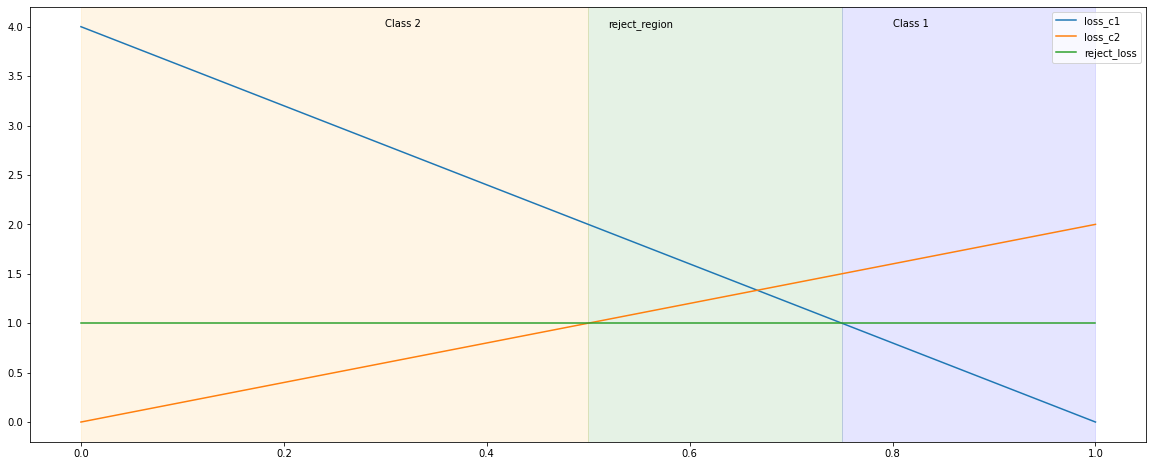

In [1]:
import numpy as np
import matplotlib.pyplot as plt


p_c1_x=np.linspace(0,1,100)

loss_call_1=np.linspace(4,0,100)
loss_call_2=np.linspace(0,2,100)

loss_reject=np.array([1]*100)

plt.figure(figsize=(20,8))

plt.plot(p_c1_x,loss_call_1,label='loss_c1')#y=4-4x
plt.plot(p_c1_x,loss_call_2,label='loss_c2')#y=2x
plt.plot(p_c1_x,loss_reject,label='reject_loss')#y=1


plt.axvspan(0,0.5,color='orange',alpha=0.1)
plt.axvspan(0.5,0.75,color='green',alpha=0.1)
plt.axvspan(0.75,1,color='blue',alpha=0.1)

plt.text(0.3,4,'Class 2')
plt.text(0.52,4,'reject_region')
plt.text(0.8,4,'Class 1')


plt.legend()

# Question 2: Logistic Regression (15 pts) 

Logistic regression has been traditionally used to classify data when a **linear decision boundary** is adequate. However, having an idea of what the distribution looks like could help one come up with a smart data transformation trick that could make the optimal decision boundary become (near) linear in the transformed space. In this question, you are given 2-dimensional data, and each data point belongs to either class 0 or class 1. 

a) **(5 pts)** Train a logistic regression classifier using X_train, y_train. Use the trained model to make predictions on X_train, X_test respectively, and then report the accuracies and F1-scores. Sklearn has a very nice [utility](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) that helps compute the precision, recall, accuracy and F1-scores. 

b) **(5 pts)** Plot the X_train data using matplotlib, use different colors to represent different classes. Comment on the pattern of data distributions, and reason why the logistic regression classifier in (a) does not perform very well.  

c) **(5 pts)** Transform the input X_train and X_test data in such a way that a linear decision boundary will be effective. Train a new logistic regression classifier on this transformed X_train data. Use the trained model to make predictions on transformed X_train, transformed X_test respectively, and then report the accuracies and F1-scores. 

**Hint**: Carefully analyze the plot you made in (b), observe the decision boundaries, which should guide you towards the right direction.

## Ans a)

In [2]:
import numpy as np

from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import classification_report

x1 = np.random.uniform(low=-7.5, high=7.5, size=300)
x2 = np.random.uniform(low=-7.5, high=7.5, size=300)

y_fn = (0.3*x1**2 + 0.8*x2**2) <10

from matplotlib import pyplot as plt

X_train = np.column_stack([x1, x2])
y_train = y_fn
print("Train: ", X_train.shape)

x1 = np.random.uniform(low=-7.5, high=7.5, size=100)
x2 = np.random.uniform(low=-7.5, high=7.5, size=100)
y_fn = (0.3*x1**2 + 0.8*x2**2) <10

X_test = np.column_stack([x1, x2])
y_test = y_fn
print("Test: ", X_test.shape)

X_train = X_train + np.random.random(size=X_train.shape)/10
X_test = X_test + np.random.random(size=X_test.shape)/10


lr_model=lr()

lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)


print('train_set_report',classification_report(y_train,lr_model.predict(X_train),
                            target_names = ['class 0', 'class 1']),sep='-->\n',end='\n\n\n')
print('test_set_report',classification_report(y_test,y_pred,
                            target_names = ['class 0', 'class 1']),sep='-->\n')

Train:  (300, 2)
Test:  (100, 2)
train_set_report-->
              precision    recall  f1-score   support

     class 0       0.73      1.00      0.84       219
     class 1       0.00      0.00      0.00        81

    accuracy                           0.73       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.53      0.73      0.62       300



test_set_report-->
              precision    recall  f1-score   support

     class 0       0.66      1.00      0.80        66
     class 1       0.00      0.00      0.00        34

    accuracy                           0.66       100
   macro avg       0.33      0.50      0.40       100
weighted avg       0.44      0.66      0.52       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

## Ans B

Text(0.5, 1.0, 'Transformed data')

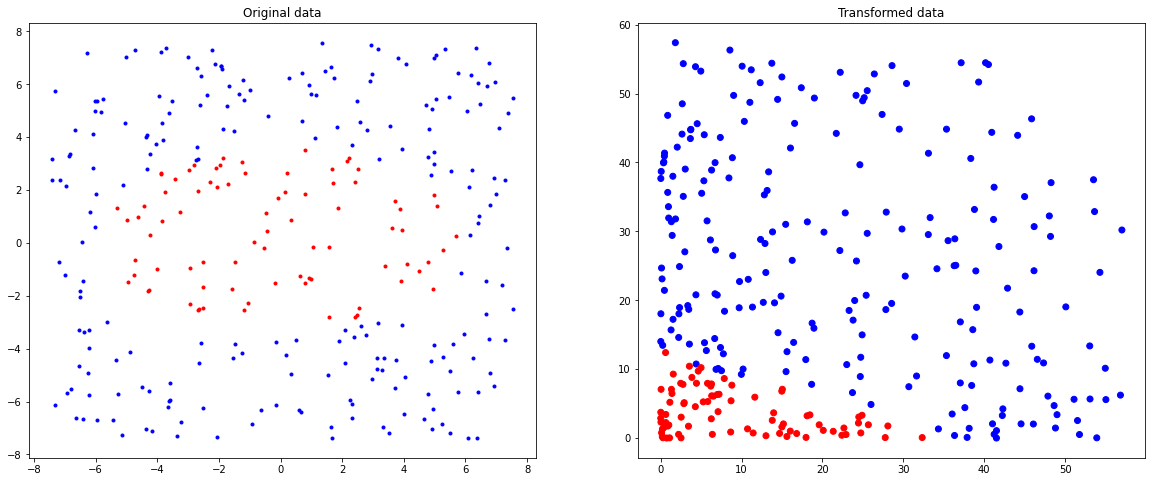

In [3]:
y_tr_col=['red' if i else 'blue' for i in y_train ]


f,ax=plt.subplots(1,2,figsize=(20,8))
for xy, c in zip(X_train, y_tr_col):
    ax[0].plot(xy[0],xy[1],'.',color=c, picker=True)
    ax[0].set_title('Original data')
ax[1].scatter(pow(X_train[:,0],2),pow(X_train[:,1],2),color=y_tr_col,picker=True)
ax[1].set_title('Transformed data')
# plt.plot(X_train[:,0],X_train[:,1],'.',color='r')#=y_tr_col)
# y_tr_col


## Observations

We observed that a linear boundary cannot be formulated to distinguish between two clusters.
Therefore we need to perform some feature based transformations in order to formulate linear separator.

We can observe that the magnitude of blue points are more than that of red points, thus we need to find a transformation that put more emphasise on magnitude of points and not only on orientation of vectors
Therefore we decided to opt for polynomial features.

## Ans C

In [4]:
x_train_transformed=pow(X_train,2)
x_test_transformed=pow(X_test,2)

lr_model=lr()

lr_model.fit(x_train_transformed,y_train)
y_pred=lr_model.predict(x_test_transformed)


print('train_set_report',classification_report(y_train,lr_model.predict(x_train_transformed),
                            target_names = ['class 0', 'class 1']),sep='-->\n',end='\n\n\n')
print('test_set_report',classification_report(y_test,y_pred,
                            target_names = ['class 0', 'class 1']),sep='-->\n')




train_set_report-->
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       219
     class 1       0.99      0.99      0.99        81

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



test_set_report-->
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        66
     class 1       1.00      1.00      1.00        34

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



Precision recall and the harmonic mean of the two that is the f1-score improved to its best/optimal value on transforming the data.

This can be visualised from the scatter plot of the transformed curves that we can achieve a linear discriminant boundary two distinguish between two clusters

Our model can now precisely predict more number of correct clusters and also able to capture almost all available cluster points

# Question 3: Bayesian Network (5 pts)

A Bayesian network is a directed acyclic graph (DAG) that captures a subset of the independence relationships of a given joint probability distribution. 

In a Bayesian network $G=(V,E)$, each node $i \in V$in the directed graph corresponds to a random variable and each directed edge $e \in E$ represents a statistical dependence. Each node is associated with a conditional probability distribution of the corresponding random variables given its parents in the DAG. The joint probability distribution factorizes w.r.t the directed graph $G$ if $p(x_1, ..., x_n)=\prod_{i \in V} p(x_i | x_{parents(i)})$, provided the variables are visited in a topologically sorted order. Please write the joint probability distribution that factorizes w.r.t this graph, in as simple a form as possible (i.e. that results in the smallest possible conditional probability tables:


In [5]:
%%html
<iframe src="https://drive.google.com/file/d/1XigbvsWpNvlols3QarVjDfYf2Dnf3emy/preview" width="640" height="480" allow="autoplay"></iframe>

## Answer:

Independent nodes
Node with their immediate contributors/parent
A- []
B- [A]
C- [A,E]
D-[B]
E-[B]
F-[D,E,C]

$$P(A,B,C,D,E,F)=P(F|D,E,C)*P(D|B)*P(E|B)*P(C|A,E)*P(B|A)*P(A)
$$



# Question 4: Counterfactuals (25 pts)


To show the effectiveness of a newly proposed model, one needs to compare it with multiple  existing solutions, across multiple datasets with different properties, and typically using multiple evaluation metrics. 

One of the emerging requirements in industry is to be able to explain decisions, and counterfactual (CF) explanations turn out to be a lead contender. Hence a new CF approach also needs to be evaluated comprehensively. See [1] for a review on conterfactual explanations. 

An example of a short comparative testing for CFs is given in [2], (you don’t need to understand the method in [2] since I have not covered this type of techinques in class, just see the result tables). The goal of this question is to **try to obtain results that are similar to those reported in [2]** (note that they give details of their model settings in the appendix). In particular, you will evaluate the following datasets: Breast Cancer, Pima diabetes and Adult Census across 5 metrics (Validity, sparsity, proximity, diversity, in-distributionness). 

**Note**: **Section A** students only need to report on the **Breat Cancer and Adult Census datasets** while **Section B** students only need to report results on the **Pima diabetes and Adult Census datasets**.

[1] Verma, Dickerson, Hines. Counterfactual Explanations for Machine Learning: A Review. [arXiv:2010.10596](https://arxiv.org/abs/2010.10596) (2020) 

[2] Samoilescu, et al. Model-agnostic and Scalable Counterfactual Explanations via Reinforcement Learning.  [arXiv:2106.02597](https://arxiv.org/abs/2106.02597) (2021) 


a) Train **Random Forest, MLP and Logistic Regression** models on your datasets and report the accuracies on each of the datasets, show the accuracy on both the training and test set in a table.

Use the code snippets given below to load the datasets and make the split using the following code snippet: ```X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)``` 

```
# Breast cancer dataset, for Section A only
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

# Pima Diabetes dataset, for Section B only
def load_diabetes():
  df = pd.read_csv('diabetes.csv')
  X = df.drop(['Outcome'], axis=1)
  y = df[['Outcome']]
  return X, np.reshape(y, (-1, ))

X, y = load_diabetes()

# adult census dataset, for Section A and Section B
def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()
```
b) For each of the datasets, plot the calibration curves for the test set. The [module](https://scikit-learn.org/stable/modules/calibration.html) from sklearn should help.

For each dataset, the calibration curve should show a y=x line as the perfect calibration, as well as the calibration curves for each of the model predictions on the test set. Mark the plots correctly using a legend.

c) [DiCE](https://github.com/interpretml/DiCE) is an open-source library that is based on the paper [Explaining Machine Learning Classifiers through Diverse Counterfactual Explanations](https://arxiv.org/abs/1905.07697). The codebase has 3 methods in which they generate counterfactuals - random sampling, KD-tree and genetic algorithm. Use DiCE (random) and DiCE (genetic) to generate 5 counterfactuals each for the first 50 data point in the test set for each of the models. Report the following metrics for each of the datasets and each of the models. So essentially, you will need to create a table for each dataset where the metrics are present in the columns and each row represents a different model. 

Here are some pointers that will help you get started with DiCE and the metrics needed. 
- Install the library using ```!pip install dice-ml```
- They have an excellent documentation on their GitHub, and their implementation notebooks will be very helpful. You can check [this](https://github.com/interpretml/DiCE/blob/master/docs/source/notebooks/DiCE_model_agnostic_CFs.ipynb) to get started.
- Section 4.1 in the [DiCE paper](https://arxiv.org/pdf/1905.07697.pdf) discuss and mathematically formulate validity, sparsity, diversity and proximity. Read those carefully and implement functions that can evaluate the metrics. Use the ```Continuous-Proximity``` metric just for simplicity. Use the ```Diversity``` metric and not ```Count-Diversity```.
- For the in-distributionness, use the following code snippet to evaluate the MMD (maximum mean discrepancy) score.

```
def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()
```


# Answer:

## DATASET 0 _CancerBased

## Ans a)

In [6]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.linear_model import LogisticRegression as lr

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def report_accuracy(model,X,y,
                    cache=False):
  '''
  model is an instance of already instantiated classifier
  '''
  x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                      test_size=0.33,
                                                      random_state=42)
  
  model.fit(x_train,y_train)

  if cache:
    global dict_trained_model
    assert(isinstance(dict_trained_model,dict))

    dict_trained_model[model.__name__]=model


  train_pred=model.predict(x_train)
  test_pred=model.predict(x_test)

  train_acc=accuracy_score(y_train,train_pred)
  test_acc=accuracy_score(y_test,test_pred)

  acc_dict={
      'train_acc_' : train_acc,
      'test_acc_' : test_acc
  }

  return acc_dict

# report
  
  
  



In [7]:
import pandas as pd

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

In [8]:
X.__name__='breast_cancer_data'

lt_models=[]

m1=rfc()
m1.__name__='random_forest_classifier'
lt_models.append(m1)

m2=lr()
m2.__name__='logistic_regression_classifier'
lt_models.append(m2)

m3=mlp()
m3.__name__='MLP_classifier'
lt_models.append(m3)

report_dict={}
# dict_trained_model={}

for m in lt_models:
  k=X.__name__ + '_'+m.__name__
  temp=report_accuracy(m,X,y)

  report_dict[k]=temp



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [9]:
# import re 
# pattern=r'[},]'
# ss=str(report_dict)

# re.split(pattern,ss)
# print('\n'.join(str(report_dict).split('}')))

import json

print(json.dumps(report_dict,indent=3))

{
   "breast_cancer_data_random_forest_classifier": {
      "train_acc_": 1.0,
      "test_acc_": 0.9680851063829787
   },
   "breast_cancer_data_logistic_regression_classifier": {
      "train_acc_": 0.952755905511811,
      "test_acc_": 0.9680851063829787
   },
   "breast_cancer_data_MLP_classifier": {
      "train_acc_": 0.9422572178477691,
      "test_acc_": 0.9787234042553191
   }
}


## Adult Census Data

In [27]:
import io

def load_adult():
  df = pd.read_csv('adult.csv')
  df = pd.get_dummies(df)
  X = df.drop(['target'], axis=1)
  y = df[['target']]
  return X, np.reshape(y, (-1, ))

X, y = load_adult()


In [28]:
X.__name__='adult_data'

lt_models=[]

m1=rfc()
m1.__name__='random_forest_classifier'
lt_models.append(m1)

m2=lr()
m2.__name__='logistic_regression_classifier'
lt_models.append(m2)

m3=mlp()
m3.__name__='MLP_classifier'
lt_models.append(m3)

report_dict={}
# dict_trained_model={}

for m in lt_models:
  k=X.__name__ + '_'+m.__name__
  temp=report_accuracy(m,X,y)

  report_dict[k]=temp



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGEN

In [30]:
print(json.dumps(report_dict,indent=3))

{
   "adult_data_random_forest_classifier": {
      "train_acc_": 1.0,
      "test_acc_": 0.8534338358458962
   },
   "adult_data_logistic_regression_classifier": {
      "train_acc_": 0.7894567957827183,
      "test_acc_": 0.794714312302252
   },
   "adult_data_MLP_classifier": {
      "train_acc_": 0.793628237451295,
      "test_acc_": 0.7994602642843849
   }
}


## Ans B

### DATSET_0_Breast_cancer

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


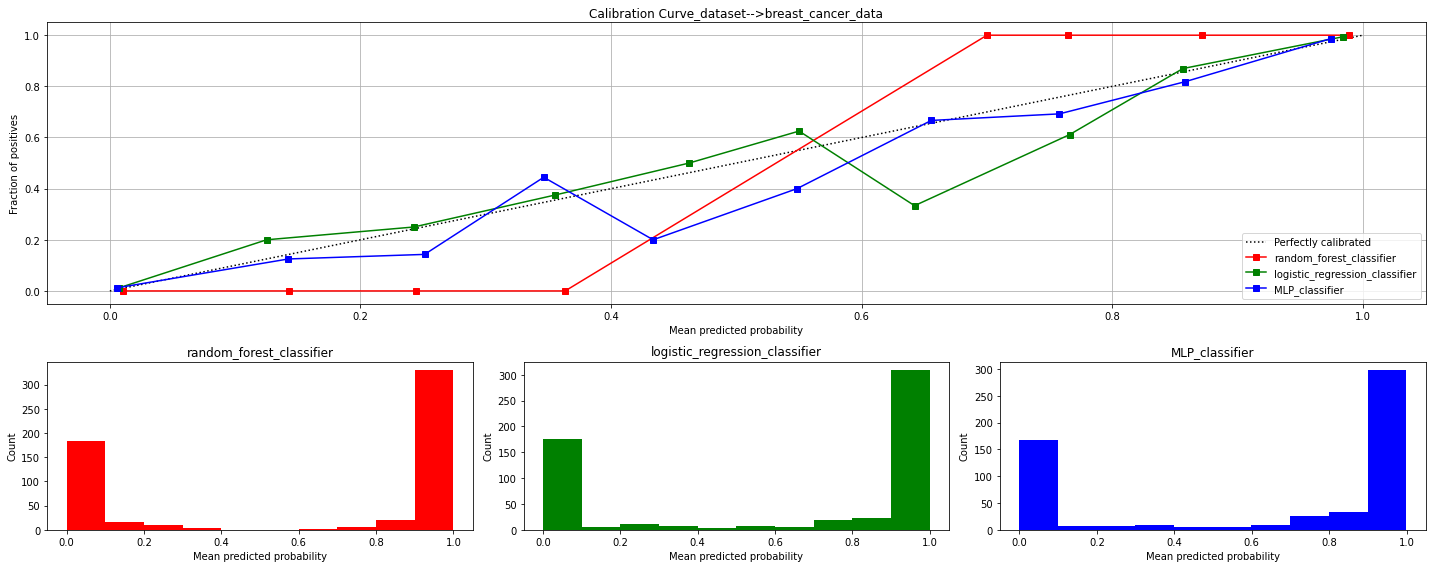

In [11]:
# !pip install -U scikit-learn
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import  CalibrationDisplay

dt_trained_models={}

fig=plt.figure(figsize=(20,8))

gs = GridSpec(5, 3)
col = ['red','green','blue']

ax_calibration_curve = fig.add_subplot(gs[:3, :3])

for i,m in enumerate(lt_models):
  m.fit(X,y)
  dt_trained_models[m.__name__]=m


  plt_disp = CalibrationDisplay.from_estimator(
    m,
    X,
    y,
    n_bins=10,
    name=m.__name__,
    ax=ax_calibration_curve,
    color=col[i])
  
  temp_ax=fig.add_subplot(gs[3:5,i])
  temp_ax.hist(
      plt_disp.y_prob,
      label=m.__name__,
      bins=10,
      color=col[i]
  )
  temp_ax.set(title=m.__name__, xlabel="Mean predicted probability", ylabel="Count")


ax_calibration_curve.grid()
ax_calibration_curve.set(title='Calibration Curve_dataset-->'+X.__name__)


plt.tight_layout()


### DATSET_Adult_Cencus

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


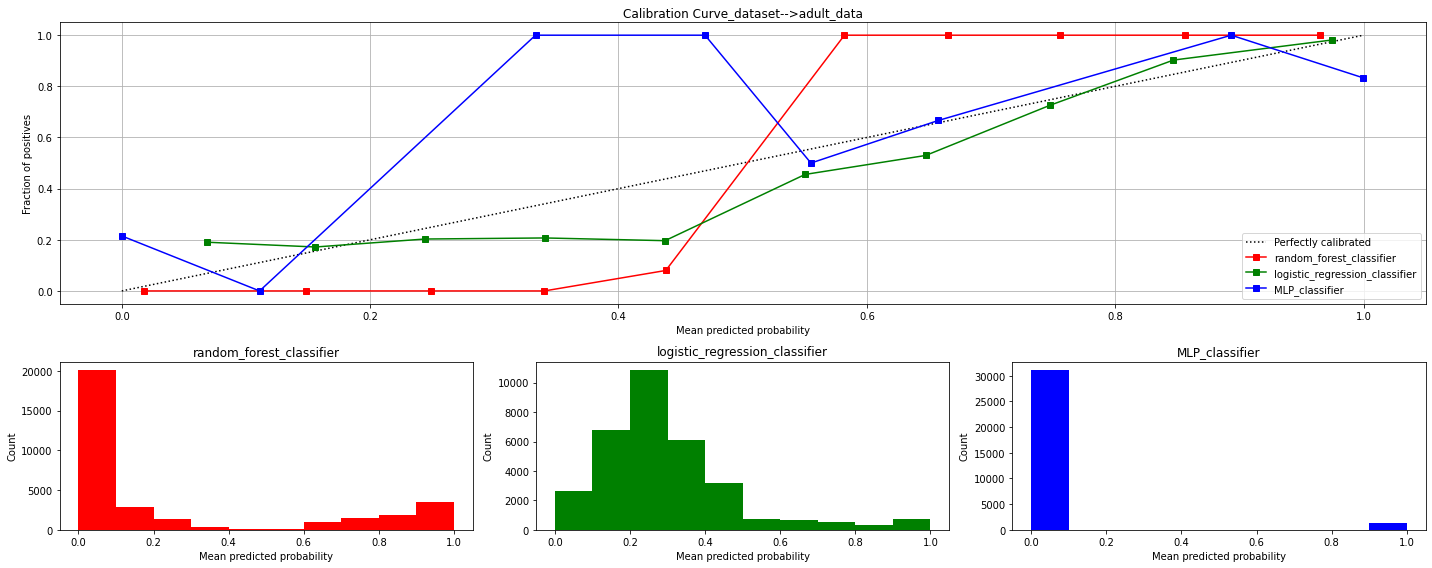

In [31]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibrationDisplay

dt_trained_models={}

fig=plt.figure(figsize=(20,8))

gs = GridSpec(5, 3)
col = ['red','green','blue']

ax_calibration_curve = fig.add_subplot(gs[:3, :3])

for i,m in enumerate(lt_models):
  m.fit(X,y)
  dt_trained_models[m.__name__]=m


  plt_disp = CalibrationDisplay.from_estimator(
    m,
    X,
    y,
    n_bins=10,
    name=m.__name__,
    ax=ax_calibration_curve,
    color=col[i])
  
  temp_ax=fig.add_subplot(gs[3:5,i])
  temp_ax.hist(
      plt_disp.y_prob,
      label=m.__name__,
      bins=10,
      color=col[i]
  )
  temp_ax.set(title=m.__name__, xlabel="Mean predicted probability", ylabel="Count")


ax_calibration_curve.grid()
ax_calibration_curve.set(title='Calibration Curve_dataset-->'+X.__name__)


plt.tight_layout()


# Ans c
CounterFactuals

Five functions defined for five different mentioned metrics
Following, counterfactuals were extracted for the two dataset and scores of respective metric was evaluated and documented

## Functions for the five metrics

In [14]:
# !pip install dice-ml
import dice_ml
from dice_ml.utils import helpers

     |████████████████████████████████| 242 kB 5.4 MB/s 


## Validity

Validity refers to number of unique counterfactuals generated as a fraction of number of counterfactuals expected
Expected number is equal to number passed as the parameter.

Unique cf Generated can be counted observing number of instances in which the observation has changed.

In [15]:
def validity(dice_exp,agg=np.mean,cfs=5):
  '''
  dice_exp=list of counterfactuals in form of dataframe stored in experiment object
  aggregator = for aggregating validity of 50 instances
  cfs=counterfactuals expected per experiment
  '''
  validity=[]

  for i in dice_exp.cf_examples_list:
    temp_df=i.final_cfs_df
    if isinstance(temp_df,type(pd.DataFrame())):
      new_cfs=temp_df.drop_duplicates().shape[0]
      # print(temp_df.drop_duplicates().shape)
    else:
      new_cfs=0

    validity_temp=new_cfs/cfs
    validity.append(validity_temp)

   
  return agg(validity)



## Proximity

Three step process 
- Compute L1 distance between each feature and the its respective perturbed value in the counterfactual
- Divide distance by Median absolute deviation of each feature, calculated using training data
- Summate over all counterfactuals sum of normalised L1 distance across all features


--Need to introduce separate indicator distance metric for categorical column as mad computation shoots up for categorical features, affecting the calculation of all metric scores.



In [16]:
from scipy.stats import median_absolute_deviation as mad
import sklearn.metrics as metrics

def proximity(dice_exp,num_cols,cat_cols,
              x_train,x_test,
              cf=5,agg=np.mean,delta=1e-0):
  
  num_train=x_train.loc[:,num_cols]
  mad_features=mad(num_train)
  mad_features+= delta

  n_feat=len(num_cols)+len(cat_cols)
  feat_col=num_cols+cat_cols


  def num_dist(temp_mat,true_mat):
    nonlocal mad_features,num_cols
    
    num_true_mat=true_mat.loc[:,num_cols].values
    num_temp_mat=temp_mat.loc[:,num_cols].values
    
    normalised_li_dist=np.absolute(num_temp_mat-num_true_mat)/mad_features
    dist_cont=np.sum(normalised_li_dist,axis=1)/(len(num_cols))

    return dist_cont

  def cat_dist(temp_mat,true_mat):
    nonlocal cat_cols
    cat_true_mat=true_mat.loc[:,cat_cols].values
    cat_temp_mat=temp_mat.loc[:,cat_cols].values   

    dist_cat=(((cat_true_mat!=cat_temp_mat)*1).sum().sum()/(len(cat_cols)))
    return dist_cat

  lt_proximity=[]
  for i,cfi in enumerate(dice_exp.cf_examples_list):
    temp_df=cfi.final_cfs_df
    proximity=0
    if isinstance(temp_df,type(pd.DataFrame())): 
      temp_df=temp_df.drop_duplicates()

      temp_mat=temp_df.loc[:,feat_col] 
      true_mat=x_test.iloc[i:i+1,:] 

      dist_cont= num_dist(temp_mat,true_mat)
      dist_cat= 0 if len(cat_cols)==0 else cat_dist(temp_mat,true_mat)


      proximity_num=(-1/cf)*np.sum(dist_cont)
      proximity_cat=1-((1/cf)*np.sum(dist_cat))
      proximity=proximity_num+proximity_cat
    lt_proximity.append(proximity)


  return agg(lt_proximity)

## Sparsity

Normalised sum of booleans of whether the cf values differe from the original value


In [17]:
def sparsity(dice_exp,num_cols,cat_cols,
              x_train,x_test,
              cf=5,agg=np.mean):
  
  feat_col=num_cols+cat_cols
  n_feat=len(feat_col)

  lt_sparsity=[]
  for i,cfi in enumerate(dice_exp.cf_examples_list):
    temp_df=cfi.final_cfs_df
    sparsity=0
    if isinstance(temp_df,type(pd.DataFrame())): 
      temp_df=temp_df.drop_duplicates()
      temp_mat=temp_df.loc[:,feat_col].values
      
      true_mat=x_test.iloc[i:i+1,:].values

      num_changes=np.sum((temp_mat!=true_mat).astype(int))

      normalised_num_changes=num_changes/(cf*n_feat)
      sparsity=1-normalised_num_changes


    lt_sparsity.append(sparsity)

  return agg(lt_sparsity)

## Diversity 

For each instance we need to calculate distance between all counterfactuals.
This can be achieved by considering distance between each combination of counterfactuals.

We will use broadcasting and masking based methods to compute diversity.
Further we will be using L1 distance as out metric

In [18]:
def diversity(dice_exp,num_cols,cat_cols,
              x_train,x_test,
              cf=5,agg=np.mean,delta=1e-1):
  
  num_train=x_train.loc[:,num_cols]
  mad_features=mad(num_train)
  mad_features+= delta

  n_feat=len(num_cols)+len(cat_cols)
  feat_col=num_cols+cat_cols


  def num_dist(temp_mat):
    nonlocal mad_features,num_cols
    
    num_temp_mat=temp_mat.loc[:,num_cols].values

    cf_i=num_temp_mat.shape[0]
    feat_i=num_temp_mat.shape[1]

    temp_mat_norm=num_temp_mat/mad_features

    twin_1=temp_mat_norm.reshape(cf_i,1,feat_i)
    twin_2=temp_mat_norm.reshape(1,cf_i,feat_i)

    diff_mat=np.abs(twin_1-twin_2)#For categorical features this distance definition will change

    l1=(1/feat_i)*(np.sum(diff_mat,axis=2))

    l1_up_triu=l1[np.triu_indices(l1.shape[0],1)]

    diversity_cont=(np.sum(l1_up_triu))/(cf_i*cf_i)
    return diversity_cont

  def cat_dist(temp_mat):
    nonlocal cat_cols
    cat_temp_mat=temp_mat.loc[:,cat_cols].values   

    cf_i=cat_temp_mat.shape[0]
    feat_i=cat_temp_mat.shape[1]

    twin_1=cat_temp_mat.reshape(cf_i,1,feat_i)
    twin_2=cat_temp_mat.reshape(1,cf_i,feat_i)

    diff_mat=((twin_1!=twin_2)*1)
    l1=(1/feat_i)*(np.sum(diff_mat,axis=2))
    l1_up_triu=l1[np.triu_indices(l1.shape[0],1)]

    diversity_cat=(np.sum(l1_up_triu))/(cf_i*cf_i)    
    return diversity_cat

  lt_diversity=[]
  for i,cfi in enumerate(dice_exp.cf_examples_list):
    temp_df=cfi.final_cfs_df
    diversity=0
    if isinstance(temp_df,type(pd.DataFrame())): 
      temp_df=temp_df.drop_duplicates()
      temp_mat=temp_df.loc[:,feat_col]

      div_cat=0
      if len(cat_cols)>0:
        div_cat=cat_dist(temp_mat)
      div_num=num_dist(temp_mat)

      diversity=div_cat+div_num
    lt_diversity.append(diversity)
  return agg(lt_diversity)



## In distributioness

In [19]:
def eval_in_dist(dice_exp,x_test,
              cf=5,agg=np.mean):
  feat_col=x_test.columns.to_list()
  

  def get_mmd_rbf(X, Y, gamma=1.0):
    """MMD using rbf (gaussian) kernel (i.e., k(x,y) = exp(-gamma * ||x-y||^2 / 2))
    Arguments:
        X {[n_sample1, dim]} -- [X matrix]
        Y {[n_sample2, dim]} -- [Y matrix]
    Keyword Arguments:
        gamma {float} -- [kernel parameter] (default: {1.0})
    Returns:
        [scalar] -- [MMD value]
    """
    XX = metrics.pairwise.rbf_kernel(X, X, gamma)
    YY = metrics.pairwise.rbf_kernel(Y, Y, gamma)
    XY = metrics.pairwise.rbf_kernel(X, Y, gamma)
    return XX.mean() + YY.mean() - 2 * XY.mean()

  lt_inDist=[]
  for i,cfi in enumerate(dice_exp.cf_examples_list):
    temp_df=cfi.final_cfs_df
    proximity=0
    if isinstance(temp_df,type(pd.DataFrame())): 
      temp_df=temp_df.drop_duplicates()
      temp_df=temp_df.astype(float)
      
      temp_mat=temp_df.loc[:,feat_col] 
      true_mat=x_test.iloc[i:i+1,:] 

      val_dist=get_mmd_rbf(temp_mat,true_mat)
      lt_inDist.append(val_dist)

    return agg(lt_inDist)




## Dataset - 0_breastCancer

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
X = pd.DataFrame(data=X, columns=cols)

x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)


dataset=np.concatenate([X.values,
                  y.reshape(-1,1)],axis=1)
dataset=pd.DataFrame(dataset,columns=X.columns.to_list()+['outcome'])


In [ ]:
dice_exp_dataset0={}
for i in range(len(lt_models)):

  d = dice_ml.Data(dataframe=dataset, 
                   continuous_features=X.columns.to_list(), 
                   outcome_name='outcome')

  mod_2=lt_models[i]
  mod_2.fit(x_train,y_train)

  backend = 'sklearn'
  m = dice_ml.Model(model=mod_2, backend=backend)
  query_instances = x_test[:15]#need to select first 15 isntances from the test set

  exp_random = dice_ml.Dice(d, m, method="random")

  #Will generate five Cfs and train the loss on 15 instances with desire
  #to find change in observation
  dice_exp_random = exp_random.generate_counterfactuals(query_instances, total_CFs=5,
                                                        desired_class="opposite",
                                                        verbose=True)

  dice_exp_dataset0['diceRandom_'+mod_2.__name__+'_Cancer_']=dice_exp_random

  exp_random = dice_ml.Dice(d, m, method="genetic")

  #Will generate five Cfs and train the loss on 50 instances with desire
  #to find change in observation
  dice_exp_random = exp_random.generate_counterfactuals(query_instances, total_CFs=5,
                                                        desired_class="opposite",
                                                        verbose=True)
  
  dice_exp_dataset0['diceGenetic_'+mod_2.__name__+'_Cancer_']=dice_exp_random




In [ ]:
import sklearn.metrics as metrics

lt_metrics=['validity','proximity','sparsity','diversity','in_dist']
df_metrics=pd.DataFrame(index=dice_exp_dataset0.keys(),
    columns=lt_metrics)

num_cols=X.columns.to_list()
cat_cols=[]

for k in dice_exp_dataset0.keys():

  df_metrics.loc[k,:]=[validity(dice_exp_dataset0[k],agg=np.mean,cfs=5),
        proximity(dice_exp_dataset0[k],num_cols,cat_cols,
              x_train,x_test,
              cf=5,agg=np.mean,delta=1e-0),
        sparsity(dice_exp_dataset0[k],num_cols,cat_cols,
              x_train,x_test,
              cf=5,agg=np.mean),        
        diversity(dice_exp_dataset0[k],num_cols=num_cols,cat_cols=cat_cols,
              x_train=x_train,x_test=x_test,
              cf=5,agg=np.mean,delta=0.01),
        eval_in_dist(dice_exp_dataset0[k],x_test,
              cf=5,agg=np.mean)]


df_metrics=pd.concat([df_0,df_metrics])


In [22]:
df_metrics

,validity,proximity,sparsity,diversity,in_dist
diceRandom_random_forest_classifier_Cancer_,0.946667,0.606826,0.731556,0.399888,0.299950
diceGenetic_random_forest_classifier_Cancer_,1.000000,0.684428,0.078222,0.160526,0.802504
diceRandom_logistic_regression_classifier_Cancer_,1.000000,0.772788,0.944444,0.195203,1.200000
diceGenetic_logistic_regression_classifier_Cancer_,1.000000,0.684960,0.079556,0.157820,0.802504
diceRandom_MLP_classifier_Cancer_,1.000000,0.775156,0.944000,0.181172,1.200000
diceGenetic_MLP_classifier_Cancer_,1.000000,0.695985,0.085333,0.171896,0.802504


## Dataset - Adult Cencus




In [ ]:
df = pd.read_csv('adult.csv')
df = pd.get_dummies(df)
X = df.drop(['target'], axis=1)
# y = (df['target'].map(lambda x :'A' if x==0 else 'N')).values
y = df['target'].values

lt_models=[]

m1=rfc()
m1.__name__='random_forest_classifier'
lt_models.append(m1)

m2=lr()
m2.__name__='logistic_regression_classifier'
lt_models.append(m2)

m3=mlp()
m3.__name__='MLP_classifier'
lt_models.append(m3)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.33, stratify=y,
                                               random_state=42)

dataset=np.concatenate([X.values,
                  y.reshape(-1,1)],axis=1)
dataset_=pd.DataFrame(dataset,columns=X.columns.to_list()+['target'])

num_cols=[k for k,val in X.nunique().items() if val>2]
cat_cols=[i for i in dataset_.columns if i not in num_cols]

delta_type={
    str(i):(float if i in num_cols else float) for i in dataset_.columns
}

dataset=dataset_.astype(delta_type)



In [ ]:
dice_exp={}
for i in range(len(lt_models)):
  d = dice_ml.Data(dataframe=dataset, continuous_features=X.columns.to_list(), outcome_name='target')

  mod_0=lt_models[i]
  mod_0.fit(x_train,y_train)

  backend = 'sklearn'
  m = dice_ml.Model(model=mod_0, backend=backend)

  query_instances = x_test[:50]#need to select first 50 isntances from the test set


  exp_genetic = dice_ml.Dice(d, m, method="genetic")
  dice_exp_genetic= exp_genetic.generate_counterfactuals(query_instances, total_CFs=5,
                                                        desired_class='opposite')


  dice_exp['diceGenetic_'+mod_0.__name__+'_datasetAdult_']=dice_exp_genetic


In [ ]:
delta_type={
    str(i):(float if i in num_cols else str) for i in dataset_.columns
}

dataset=dataset_.astype(delta_type)

for i in range(len(lt_models)):
  d = dice_ml.Data(dataframe=dataset, continuous_features=num_cols, outcome_name='target')

  mod_0=lt_models[i]
  mod_0.fit(x_train,y_train)

  backend = 'sklearn'
  m = dice_ml.Model(model=mod_0, backend=backend)

  query_instances = x_test[:5]#need to select first 50 isntances from the test set


  exp_genetic = dice_ml.Dice(d, m, method="random")
  dice_exp_genetic= exp_genetic.generate_counterfactuals(query_instances, total_CFs=5,
                                                        desired_class='opposite')


  dice_exp['diceRandom_'+mod_0.__name__+'_datasetAdult_']=dice_exp_genetic

In [ ]:
dice_exp
cat_cols=[i for i in cat_cols if i != 'target']

import sklearn.metrics as metrics

lt_metrics=['validity','proximity','sparsity','diversity','in_dist']
df_metrics=pd.DataFrame(index=dice_exp.keys(),
    columns=lt_metrics)

for k in dice_exp.keys():

  df_metrics.loc[k,:]=[validity(dice_exp[k],agg=np.mean,cfs=5),
        proximity(dice_exp[k],num_cols,cat_cols,
              x_train,x_test,
              cf=5,agg=np.mean,delta=1e-0),
        sparsity(dice_exp[k],num_cols,cat_cols,
              x_train,x_test,
              cf=5,agg=np.mean),        
        diversity(dice_exp[k],num_cols=num_cols,cat_cols=cat_cols,
              x_train=x_train,x_test=x_test,
              cf=5,agg=np.mean,delta=0.01),
        eval_in_dist(dice_exp[k],x_test,
              cf=5,agg=np.mean)]


In [33]:
df_metrics

,validity,proximity,sparsity,diversity,in_dist
diceGenetic_random_forest_classifier_datasetAdult_,0.996,-108.562464,0.891273,4087.643693,0.800000
diceGenetic_logistic_regression_classifier_datasetAdult_,0.992,-521.740777,0.889515,12792.817480,0.800000
diceGenetic_MLP_classifier_datasetAdult_,1.000,-570.913490,0.884545,18758.365770,0.800000
diceRandom_random_forest_classifier_datasetAdult_,1.000,-6022.924075,0.976970,144823.366600,1.200000
diceRandom_logistic_regression_classifier_datasetAdult_,1.000,-5090.946180,0.976970,159681.684400,1.299118
diceRandom_MLP_classifier_datasetAdult_,1.000,-3157.279224,0.969697,109651.150200,1.258861


## Rough Space

In [ ]:
# df_metrics

In [ ]:
# temp_mat.shape

# aa=np.random.normal(size=(5,5))
# aa=np.arange(25).reshape(5,5)

# aa[np.triu_indices(aa.shape[0],1)]
# # aa


In [ ]:
# # x_test.iloc[:2].values-[i.final_cfs_df for i in dice_exp_random.cf_examples_list][0].iloc[:,:30].values
# i=1
# pd.DataFrame(np.concatenate([x_test.iloc[i:i+1,:].values,
#                              y_test[i:i+1].reshape(-1,1)],axis=1),
#              columns=X.columns.to_list()+['outcome'])

# # y_test[i:i+1]
# # x_test.iloc[i:i+1,:].values

In [ ]:
# [i.final_cfs_df for i in dice_exp_random.cf_examples_list][1]#.shape

In [ ]:
# [i.new_outcome for i in dice_exp_random.cf_examples_list]

In [ ]:
# [dir(i) for i in dice_exp_random.cf_examples_list][0]

In [ ]:
# len(obj['test_data'])

# a=np.array(obj['test_data'])
# a=a.reshape(50,31)

# a

In [ ]:
# a_true=x_test.iloc[:50].values

In [ ]:
# # np.concatenate([a[8:9,:10],a_true[8:9,:10]],axis=0)

# np.sum(a[:,:30]-a_true,axis=1)

In [ ]:
# import re 
# pattern1=r'({)'
# pattern2=r'(},)'
# pattern3=r'(})|(},)'

# ss=str(report_dict)

# #need to loop or pipe let's loop
# ss=re.sub(pattern1,'\\1\n\n\t',ss)
# ss=re.sub(pattern2,'\\1\n\n',ss)

# print(ss)

In [ ]:
# fig,ax=plt.subplots(4,4,figsize=(20,8))


# temp_ax=ax[:2,:2]


# temp_ax.plot(np.linspace(0,10,5))

In [ ]:
# re.sub()
# dir(dice_exp_random)
# ss=dice_exp_random.to_json()
# obj = json.loads(ss)

In [ ]:
# normalised_li_dist=np.absolute(temp_mat-true_mat)/mad_features
# np.sum(normalised_li_dist)#,axis=1)

# np.sum((temp_mat!=true_mat).astype(int))/(cf*n_feat)

In [ ]:
# cf_i=temp_mat.shape[0]
# feat_i=temp_mat.shape[1]

# mad_features=mad(x_train)
# temp_mat_norm=temp_mat/mad_features

# twin_1=temp_mat_norm.reshape(cf_i,1,feat_i)
# twin_2=temp_mat_norm.reshape(1,cf_i,feat_i)

# diff_mat=np.abs(twin_1-twin_2)

# l1=(1/feat_i)*(np.sum(diff_mat,axis=2))

# l1_up_triu=l1[np.triu_indices(l1.shape[0],1)]

# diversity=(np.sum(l1_up_triu))/(cf_i*cf_i)
# diversity
# # l1_up_triu

In [ ]:
# cf_examples_list=[]
# ddf=pd.read_csv('data_breast_cancer_cf.csv',index_col=[0,1])
# for cf, just_df in ddf.groupby(level=0):
#   just_df=just_df.droplevel(0)
#   cf_examples_list.append(just_df)
#   if just_df.shape[0]==0:
#      print(just_df.shape)
# # validity(cf_examples_list)

In [ ]:
# # # cf=5

# # # n_feat=x_train.shape[1]
# # # feat_col=X.columns.to_list()


# # # lt_sparsity=[]
# # # for i,cfi in enumerate(dice_exp_random.cf_examples_list):
# # #   temp_df=cfi.final_cfs_df
# # #   sparsity=0
# # #   if isinstance(temp_df,type(pd.DataFrame())): 
# # #     temp_df=temp_df.drop_duplicates()
# # #     temp_mat=temp_df.loc[:,feat_col].values
    
# # #     true_mat=x_test.iloc[i:i+1,:].values

# # #     num_changes=np.sum((temp_mat!=true_mat).astype(int))

# # #     normalised_num_changes=num_changes/(cf*n_feat)
# # #     sparsity=1-normalised_num_changes


# # #   lt_sparsity.append(sparsity)

# # # lt_sparsity


# for k in dice_exp.keys():
#   print(k,
#         diversity(dice_exp[k],num_cols=num_cols,cat_cols=cat_cols,
#               x_train=x_train,x_test=x_test,
#               cf=5,agg=np.mean,delta=0.01)
#   ,sep='--->')



# # cf=5

# # mad_features=mad(x_train)
# # n_feat=x_train.shape[1]
# # feat_col=X.columns.to_list()


# # lt_diversity=[]
# # for i,cfi in enumerate(dice_exp_random.cf_examples_list):
# #   temp_df=cfi.final_cfs_df
# #   diversity=0
# #   if isinstance(temp_df,type(pd.DataFrame())): 
# #     temp_df=temp_df.drop_duplicates()
# #     temp_mat=temp_df.loc[:,feat_col].values
    
# #     cf_i=temp_mat.shape[0]
# #     feat_i=temp_mat.shape[1]

# #     mad_features=mad(x_train)
# #     temp_mat_norm=temp_mat/mad_features

# #     twin_1=temp_mat_norm.reshape(cf_i,1,feat_i)
# #     twin_2=temp_mat_norm.reshape(1,cf_i,feat_i)

# #     diff_mat=np.abs(twin_1-twin_2)#For categorical features this distance definition will change

# #     l1=(1/feat_i)*(np.sum(diff_mat,axis=2))

# #     l1_up_triu=l1[np.triu_indices(l1.shape[0],1)]

# #     diversity=(np.sum(l1_up_triu))/(cf_i*cf_i)

# #     lt_diversity.append(diversity)
# # lt_diversity 

In [ ]:
# dice_exp
# cat_cols=[i for i in cat_cols if i != 'target']
# for k in dice_exp.keys():
#   print(k,
#         validity(dice_exp[k],agg=np.mean,cfs=5),
#         proximity(dice_exp[k],num_cols,cat_cols,
#               x_train,x_test,
#               cf=5,agg=np.mean,delta=1e-0),
#         sparsity(dice_exp[k],num_cols,cat_cols,
#               x_train,x_test,
#               cf=5,agg=np.mean),        
#         diversity(dice_exp[k],num_cols=num_cols,cat_cols=cat_cols,
#               x_train=x_train,x_test=x_test,
#               cf=5,agg=np.mean,delta=0.01),
#         eval_in_dist(dice_exp[k],x_test,
#               cf=5,agg=np.mean)
#   ,sep='--->')

In [ ]:

# # dataset=np.concatenate([x_test.iloc[:50,:].values,
# #                   y_test[:50].reshape(-1,1)],axis=1)


# # print(dataset.shape,x_train.shape)

# #X.info(),X.nunique()
# # All of the features seems to be continuous in form

# d = dice_ml.Data(dataframe=dataset, continuous_features=X.columns.to_list(), outcome_name='outcome')

# mod_0=lt_models[0]
# mod_0.fit(x_train,y_train)

# backend = 'sklearn'
# m = dice_ml.Model(model=mod_0, backend=backend)

# exp_random = dice_ml.Dice(d, m, method="random")
# query_instances = x_test[:50]#need to select first 50 isntances from the test set

# #Will generate five Cfs and train the loss on 50 instances with desire
# #to find change in observation
# dice_exp_random = exp_random.generate_counterfactuals(query_instances, total_CFs=5,
#                                                       desired_class="opposite",
#                                                       verbose=True)






In [32]:
# df_metrics=pd.read_csv('dataset0_metrics_final.csv',index_col=0)
#df_metrics=pd.read_csv('adult_census_metrics.csv',index_col=0)